In [31]:
!pip install -U scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.0 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 2.0 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 1.9 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 1.9 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.1 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.1 MB 1.9 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.1 MB 1.9 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 1.9 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/11.1 MB 1.9 MB/s eta 0:00:04
   ----------

  You can safely remove it manually.


In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income_dataset.csv')
df.head(10)

,id,education_outof_4,experience_in_years,employee_age,salary_in_thousand
0,1,2,1,22,30.5
1,2,3,3,25,45.0
2,3,1,5,30,35.0
3,4,4,10,35,80.0
4,5,2,2,24,32.0
5,6,3,4,27,50.0
6,7,1,7,32,40.0
7,8,4,12,40,90.0
8,9,2,3,26,38.0
9,10,3,5,29,55.0


In [3]:
df = df.drop('id', axis = 1) # drop('col_name', axis = 0 or 1)

In [4]:
print(df)

    education_outof_4  experience_in_years  employee_age  salary_in_thousand
0                   2                    1            22                30.5
1                   3                    3            25                45.0
2                   1                    5            30                35.0
3                   4                   10            35                80.0
4                   2                    2            24                32.0
..                ...                  ...           ...                 ...
95                  3                   27            61               165.0
96                  1                   29            63               120.0
97                  4                   44            82               250.0
98                  2                   26            60               155.0
99                  3                   28            62               170.0

[100 rows x 4 columns]


In [5]:
from sklearn.model_selection import train_test_split
x = df.drop('salary_in_thousand', axis = 1)
y = df['salary_in_thousand']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 20, shuffle=True) # this structuring is called 
x_train.shape, y_test.shape, x_test.head()

((80, 3),
 (20,),
     education_outof_4  experience_in_years  employee_age
 70                  2                   19            53
 6                   1                    7            32
 17                  3                    7            33
 66                  2                   18            52
 23                  4                   22            60)

In [6]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
# StandardScaler is sensitive to outliers
scaler.fit(x_train)
x_train_scaler= scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [7]:
x_train_scaler = pd.DataFrame(x_train_scaler)

In [8]:
x_train_scaler

,0,1,2
0,0.409823,-1.328794,-1.477223
1,-0.476281,-1.237153,-1.280369
2,-1.362384,-0.412384,-0.492954
3,0.409823,0.320743,0.360078
4,-1.362384,-0.504025,-0.624190
...,...,...,...
75,-1.362384,0.504025,0.491314
76,1.295927,1.695358,1.541200
77,1.295927,-0.870589,-1.083515
78,-1.362384,0.412384,0.425696


In [9]:
x_test_scaler = pd.DataFrame(x_test_scaler, columns=['1', '2', '3'])

In [10]:
x_train_scaler

,0,1,2
0,0.409823,-1.328794,-1.477223
1,-0.476281,-1.237153,-1.280369
2,-1.362384,-0.412384,-0.492954
3,0.409823,0.320743,0.360078
4,-1.362384,-0.504025,-0.624190
...,...,...,...
75,-1.362384,0.504025,0.491314
76,1.295927,1.695358,1.541200
77,1.295927,-0.870589,-1.083515
78,-1.362384,0.412384,0.425696


In [11]:
x_test_scaler

,1,2,3
0,-0.476281,-0.045820,0.097607
1,-1.362384,-1.145512,-1.280369
2,0.409823,-1.145512,-1.214751
3,-0.476281,-0.137461,0.031989
4,1.295927,0.229102,0.556932
5,0.409823,0.778948,0.688168
6,-0.476281,-1.328794,-1.411605
7,1.295927,0.045820,0.228842
8,0.409823,0.687307,0.622550
9,-1.362384,0.595666,0.556932


In [12]:
# Rename columns for x_train_scaler
x_train_scaler.rename(columns={
    0: 'education_outof_4',
    1: 'experience_in_years',
    2: 'employee_age'
}, inplace=True)

x_test_scaler.rename(columns={
    '1': 'education_outof_4',
    '2': 'experience_in_years',
    '3': 'employee_age'
}, inplace=True)

print("x_train_scaler columns:", x_train_scaler.columns)
print("x_test_scaler columns:", x_test_scaler.columns)

x_train_scaler columns: Index(['education_outof_4', 'experience_in_years', 'employee_age'], dtype='object')
x_test_scaler columns: Index(['education_outof_4', 'experience_in_years', 'employee_age'], dtype='object')


In [13]:
round(x_train_scaler.describe())

,education_outof_4,experience_in_years,employee_age
count,80.0,80.0,80.0
mean,-0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-1.0,-2.0,-2.0
25%,-0.0,-1.0,-1.0
50%,-0.0,-0.0,0.0
75%,1.0,1.0,1.0
max,1.0,3.0,3.0


In [14]:
round(x_test_scaler.describe())

,education_outof_4,experience_in_years,employee_age
count,20.0,20.0,20.0
mean,-0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0
75%,0.0,0.0,1.0
max,1.0,1.0,1.0


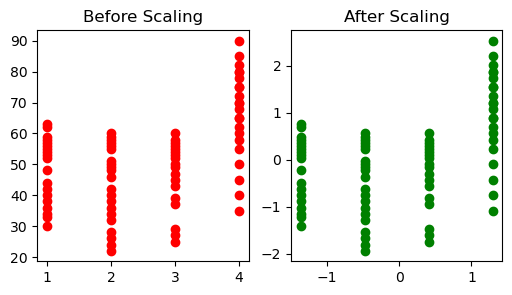

In [15]:
fig, (tnx, ttx) = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
tnx.scatter(x_train['education_outof_4'], x_train['employee_age'], color='red')
tnx.set_title("Before Scaling")
ttx.scatter(x_train_scaler['education_outof_4'], x_train_scaler['employee_age'],color='green')
ttx.set_title("After Scaling")
plt.show()

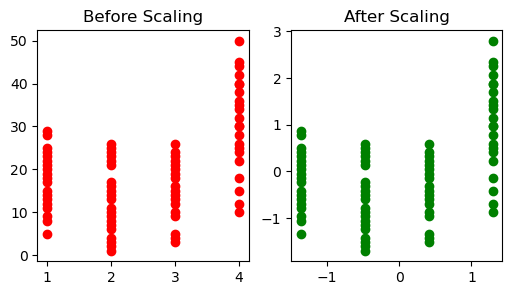

In [16]:
fig, (tnx, ttx) = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
tnx.scatter(x_train['education_outof_4'], x_train['experience_in_years'], color='red')
tnx.set_title("Before Scaling")
ttx.scatter(x_train_scaler['education_outof_4'], x_train_scaler['experience_in_years'],color='green')
ttx.set_title("After Scaling")
plt.show()

C:\Users\Predator\AppData\Local\Temp\ipykernel_23296\3002136164.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  trx.legend()
C:\Users\Predator\AppData\Local\Temp\ipykernel_23296\3002136164.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ttx.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

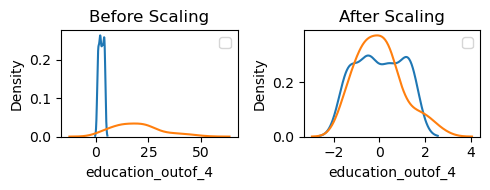

In [17]:
fig, (trx, ttx) = plt.subplots(nrows=1,ncols=2, figsize=(5,2))

sns.kdeplot(x_train['education_outof_4'], ax=trx)
sns.kdeplot(x_train['experience_in_years'], ax=trx)
trx.set_title("Before Scaling")
sns.kdeplot(x_train_scaler['education_outof_4'], ax=ttx)
sns.kdeplot(x_train_scaler['experience_in_years'], ax=ttx)
ttx.set_title("After Scaling")
trx.legend()
ttx.legend()
plt.tight_layout()
plt.show

C:\Users\Predator\AppData\Local\Temp\ipykernel_23296\1412162086.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  trx.legend()
C:\Users\Predator\AppData\Local\Temp\ipykernel_23296\1412162086.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ttx.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

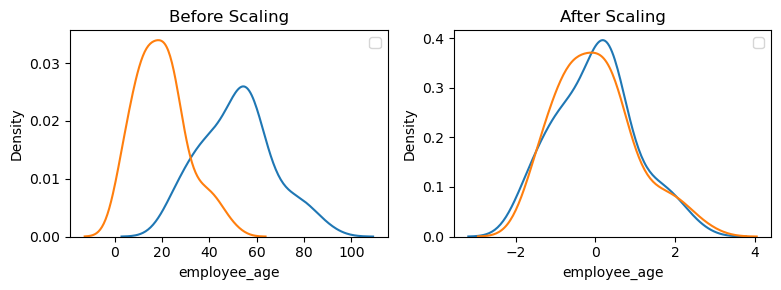

In [18]:
fig, (trx, ttx) = plt.subplots(nrows=1,ncols=2, figsize=(8,3))

sns.kdeplot(x_train['employee_age'], ax=trx)
sns.kdeplot(x_train['experience_in_years'], ax=trx)
trx.set_title("Before Scaling")
sns.kdeplot(x_train_scaler['employee_age'], ax=ttx)
sns.kdeplot(x_train_scaler['experience_in_years'], ax=ttx)
ttx.set_title("After Scaling")
trx.legend()
ttx.legend()
plt.tight_layout()
plt.show

In [19]:
y_train

9      55.0
20     55.0
38     56.0
79    145.0
34     54.0
      ...  
80    100.0
85    220.0
3      80.0
76     95.0
60     75.0
Name: salary_in_thousand, Length: 80, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression # because the x variable columns  are directlyrelated to y variable column (salary)

# Initialize and train the model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = lr.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
k = x_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - ( (1 - r2) * (n - 1) / (n - k - 1) )


print("Model Performance Metrics:")

print(f"Mean Squared Error (MSE)      : {mse:.2f} (Lower is better)")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} (Lower is better)")
print(f"Mean Absolute Error (MAE)     : {mae:.2f} (Lower is better)")
print(f"R-squared (R²)                : {r2:.2f} (Higher is better, max = 1)")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2:.2f} (Higher is better, max = 1)")

Model Performance Metrics:
Mean Squared Error (MSE)      : 159.00 (Lower is better)
Root Mean Squared Error (RMSE): 12.61 (Lower is better)
Mean Absolute Error (MAE)     : 10.36 (Lower is better)
R-squared (R²)                : 0.89 (Higher is better, max = 1)
Adjusted R-squared (Adjusted R²): 0.87 (Higher is better, max = 1)


In [22]:
# Make predictions on the test set
y_pred = lr.predict(x_test)

# Print the predictions
print("Predictions:", y_pred)

# Create a DataFrame to compare predictions with actual values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results.head())  # Display the first 10 rows

Predictions: [103.14496292  38.72721816  70.47755567  99.89526779 148.01364504
 147.70584467  47.54145345 138.14499557 144.45614953 110.57920329
 137.95675927  73.58990636  78.15092419 111.95919821  66.10477414
  74.85033721  87.96868181 106.39465805 113.82889842  48.47630356]
    Actual   Predicted
70   120.0  103.144963
6     40.0   38.727218
17    65.0   70.477556
66   115.0   99.895268
23   130.0  148.013645


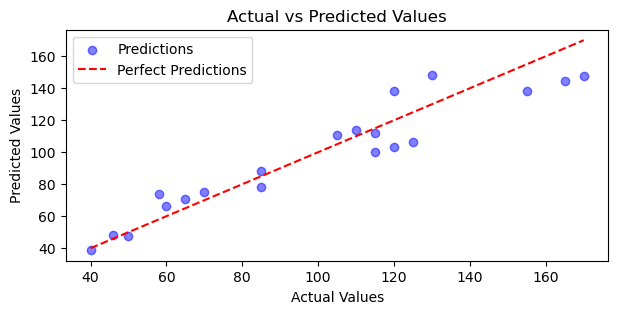

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')

# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

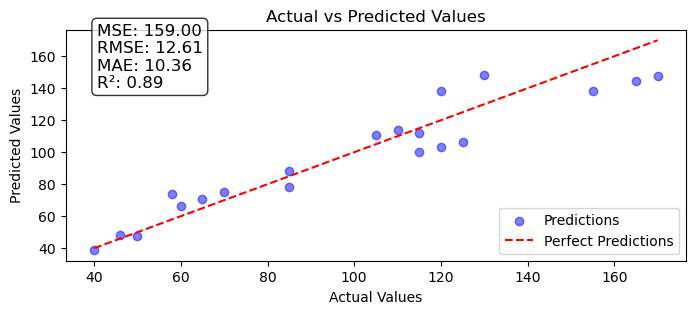

In [24]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 3))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')

# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add performance metrics as annotations
metrics_text = (
    f"MSE: {mse:.2f}\n"
    f"RMSE: {rmse:.2f}\n"
    f"MAE: {mae:.2f}\n"
    f"R²: {r2:.2f}"
)
plt.annotate(
    metrics_text,
    xy=(0.05, 0.75),  # Position of the annotation (x, y)
    xycoords='axes fraction',  # Use axes fraction for positioning
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Show the plot
plt.legend()
plt.show()

In [25]:
print("Scaler Mean:", x_train_scaler.mean)
print("Scaler Scale:", x_train_scaler.scale)

Scaler Mean: <bound method DataFrame.mean of     education_outof_4  experience_in_years  employee_age
0            0.409823            -1.328794     -1.477223
1           -0.476281            -1.237153     -1.280369
2           -1.362384            -0.412384     -0.492954
3            0.409823             0.320743      0.360078
4           -1.362384            -0.504025     -0.624190
..                ...                  ...           ...
75          -1.362384             0.504025      0.491314
76           1.295927             1.695358      1.541200
77           1.295927            -0.870589     -1.083515
78          -1.362384             0.412384      0.425696
79          -1.362384             0.045820      0.163225

[80 rows x 3 columns]>


AttributeError: 'DataFrame' object has no attribute 'scale'

In [46]:
print('education_level: ranges from 1 to 4, 1 = highschool, 2 = intermediate school, 3 = undergraduate, 4 = postgraduate\n')
print('experience_in_year: show the employee experince (input your experience)\n')
print('employee_age: show the employee age (input your age)\n')

education_level= float(input(f'whats your education qualification?'))
experience_in_years = float(input(f'whats your working experience?'))
employee_age = float(input(f'whats your age'))

new_employee = pd.DataFrame({
    'education_outof_4': [education_level],
    'experience_in_years': [experience_in_years],
    'employee_age': [employee_age]
})

print("New Employee Data:")
print(new_employee)


predicted_salary = lr.predict(new_employee)

print(f"\nPredicted Salary for the New Employee: ${predicted_salary[0]:.2f} thousand")

education_level: ranges from 1 to 4, 1 = highschool, 2 = intermediate school, 3 = undergraduate, 4 = postgraduate

experience_in_year: show the employee experince (input your experience)

employee_age: show the employee age (input your age)



whats your education qualification? 2
whats your working experience? 3
whats your age 27


New Employee Data:
   education_outof_4  experience_in_years  employee_age
0                2.0                  3.0          27.0

Predicted Salary for the New Employee: $39.92 thousand
